In [216]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot

In [237]:
def eulerstep(A, uold, h):
    unew = uold + h*A@np.transpose(uold)
    return unew

def eulerint(A, y0, t0, tf, N):
    h = (tf-t0)/N
    tgrid = np.linspace(t0, tf, N)
    y = np.zeros((N, len(y0)))
    y[0,:] = y0
    for n in range(N-1):
        y[n+1,:] = eulerstep(A, y[n,:], h)
    err = np.zeros_like(y)
    for n in range(N):
        err[n,:] = abs(np.transpose(y[n,:]) - la.expm(A*tgrid[n])@np.transpose(y0))
    return tgrid, y, err

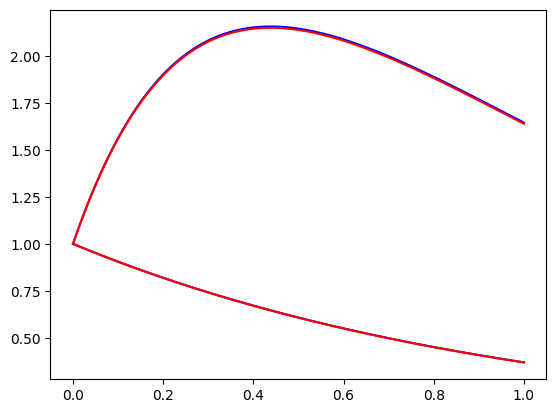

In [242]:
y0 = np.array([1,1])
A = np.array([[-1, 0], [10, -3]])

[tgrid, approx, err] = eulerint(A, y0, 0, 1, 200)
# print('Approx: '+ str(approx))
# print('Error: '+str(err))
matplotlib.pyplot.plot(tgrid, approx, 'b')
true = np.zeros_like(approx)
for n in range(len(tgrid)):
    true[n,:] = la.expm(tgrid[n]*A)@np.transpose(y0)
matplotlib.pyplot.plot(tgrid, true, 'r')

#matplotlib.pyplot.semilogy(tgrid, err, 'b')

In [243]:
def errVSh(A, y0, t0, tf):
    #Nvec = np.linspace(1, 10, 10)
    Nvec = [int(np.power(2,i)) for i in range(1, 10)]
    err = np.zeros((len(Nvec), len(y0)))
    for i in range(len(Nvec)):
        tgrid, approx, mat = eulerint(A, y0, t0, tf, Nvec[i])
        err[i,:] = mat[-1,:]

    h=np.zeros(len(Nvec))
    for i in range(len(Nvec)):
        h[i] = (tf - t0) /Nvec[i]
    matplotlib.pyplot.loglog(h, err, 'r')

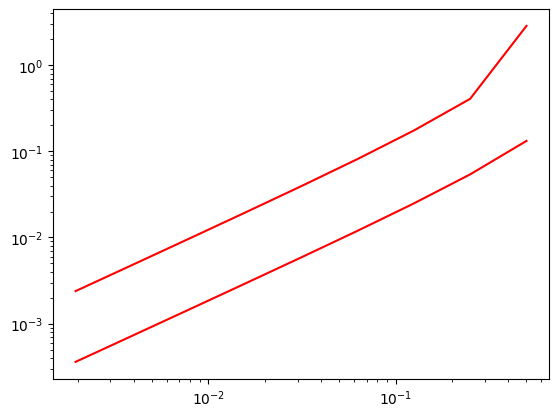

In [244]:
y0 = [1,1]
A = np.array([[-1, 0], [10, -3]])
errVSh(A, y0, 0, 1)
